# Prediction using Supervised ML

# GRIP - The Sparks Foundation

## Prediction of Scores based on Number of Study Hours

Used Python Scikit Learn(Sklearn) Library to build the Linear Regression Model

### GOALS/TASKS

1) To find the relationship between Study hours and Score.

2) If they both are related to each other then, how much is the impact of the Study Hours on the Score.

# AUTHOR

SHREYASH UPADHYAYA https://www.linkedin.com/in/shreyash24/

### IMPORTING THE REQUIRED LIBRARIES

In [4]:
# Libraries used for Data Manipulation, Analysis & Cleaning

import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

### LOADING THE DATA

In [5]:
path = 'http://bit.ly/w-data'
data = pd.read_csv(path)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# Checking the shape of data

data.shape

(25, 2)

In [7]:
# Structure of the Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# Descriptive Statistics of the Data

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# To check the Null values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## EXPLORATORY DATA ANALYSIS [EDA]

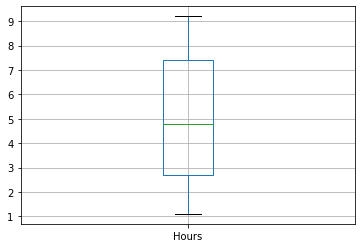

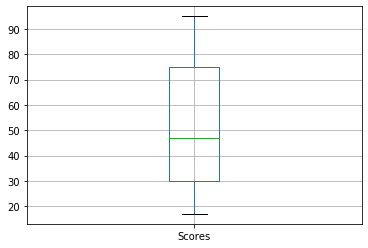

In [10]:
# To check the outliers

for i in data.columns:
    data.boxplot(column = i)
    plt.show()

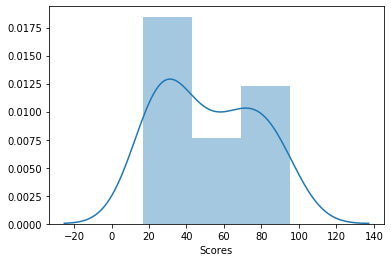

In [11]:
# To check whether data is normally Distributed 
# Normal Distribution

sns.distplot(data['Scores'])

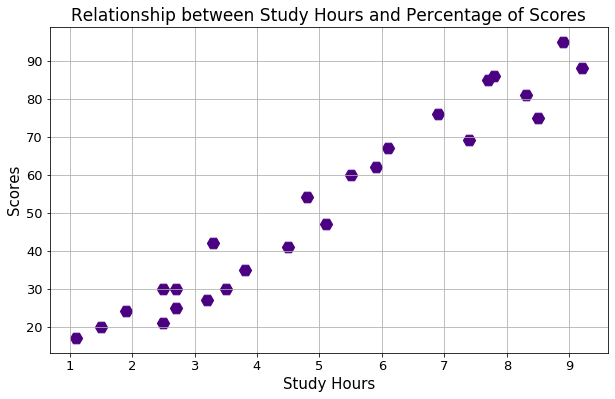

In [19]:
# To find the relationship between Study hours and Score

plt.figure(figsize = (10,6))
plt.scatter(x = 'Hours', y = 'Scores', data = data, marker = 'H', s = 150, c = 'indigo')

plt.title('Relationship between Study Hours and Percentage of Scores', fontsize = 17)
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.grid()
plt.show()

#### From the graph we can clearly state that there is a Storng Positive Linear Relation between Study hours and Scores

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


(2.0, 0.0)

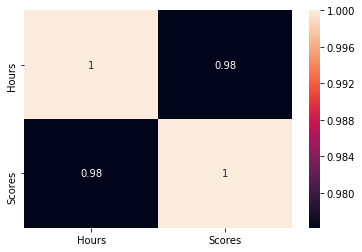

In [30]:
# Correlation Matrix

print(data.corr())
ax = sns.heatmap(data.corr(), annot = True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

### SPLITTING THE DATA INTO X & Y

In [21]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

### TRAIN TEST SPLIT

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### SIMPLE LINEAR REGRESSION

In [26]:
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(X_train, Y_train)
Y_pred = l_reg.predict(X_test)

In [27]:
# To check the Coefficient value for Study Hours Variable

l_reg.coef_

array([9.91065648])

In [28]:
# To check the Intercept value

l_reg.intercept_

2.0181600414346974

In [29]:
result = pd.DataFrame(columns = ['Actual Scores', 'Predicted Scores'])
result['Actual Scores'] = Y_test
result['Predicted Scores'] = Y_pred
result.head()

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


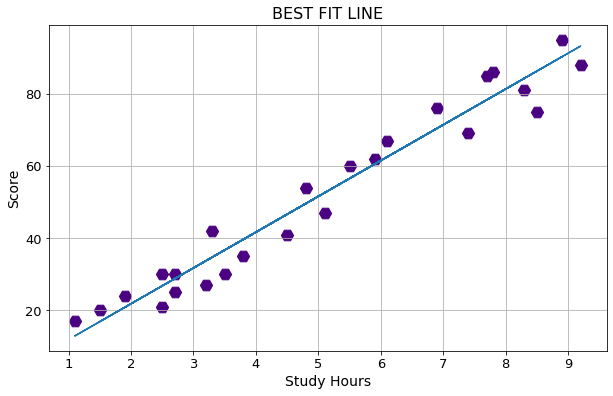

In [32]:
plt.figure(figsize = (10,6))

plt.scatter(x = 'Hours', y = 'Scores', data = data, marker = 'H', s = 150, c = 'indigo')

# Plotting the Line that the model has created
# Equation of line : y = mx + c
# m = reg_coef_
# c = reg_intercept_

plt.plot(X, l_reg.coef_ * X  + l_reg.intercept_)

plt.title('BEST FIT LINE', fontsize = 16)
plt.xlabel('Study Hours', fontsize = 14)
plt.ylabel('Score', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.grid()
plt.show()

### MODEL EVALUATION

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R-square value :', round(r2_score(Y_test, Y_pred),4),'\n')
print('Mean Absolute Error\nMAE :', round(mean_absolute_error(Y_test, Y_pred),4),'\n')
print('Mean Squared Error\nMSE :', round(mean_squared_error(Y_test, Y_pred),4),'\n')
print('Root Mean Squared Error\nRMSE :', round(np.sqrt(mean_squared_error(Y_test, Y_pred)),4),'\n')

R-square value : 0.9455 

Mean Absolute Error
MAE : 4.1839 

Mean Squared Error
MSE : 21.5988 

Root Mean Squared Error
RMSE : 4.6474 



### Predciting Score for a 9.25 of Study Hours

In [36]:
a = float(input('Number of Study Hours : '))
b = np.array(a).reshape(-1,1)
c = l_reg.predict(b)
print('You Studied for',b,'Hours and your Score is',round(c[0],2))

Number of Study Hours : 9.25
You Studied for [[9.25]] Hours and your Score is 93.69
